In [1]:
import ternary
import matplotlib 
import math as m
import pandas as pd
import numpy as np

#column1 = abundance A, as log10(A)=log10(Nx/NH)+12,
#where Nx and NH are the number densities of elements X and H 
#column2 = atomic masses in g.mol-1
data={
"Al" :  [6.45, 26.9815386],
"Ar" :  [6.40, 39.948],
"C " :  [8.43, 12.011],
"Ca" :  [6.34, 40.078],
"Cl" :  [5.50, 35.45],
"Co" :  [4.99, 58.933195],
"Cr" :  [5.64, 51.9961],
"Cu" :  [4.19, 63.546],
"F " :  [4.56, 18.9984032],
"Fe" :  [7.50, 55.845],
"Ge" :  [3.65, 72.63],
"H"  :  [12.00,1.008],          
"He" :  [10.93,4.002602],
"K " :  [5.03, 39.0983],
"Mg" :  [7.60, 24.3050],
"Mn" :  [5.43, 54.938045],
"N " :  [7.83, 14.007],
"Na" :  [6.24, 22.98976928],
"Ne" :  [7.93, 20.1797],
"Ni" :  [6.22, 58.6934],
"O " :  [8.69, 15.999],
"P " :  [5.41, 30.973762],
"S " :  [7.12, 32.06],
"Si" :  [7.51, 28.085],
"Ti" :  [4.95, 47.867],
"V " :  [3.93, 50.9415],
"Zn" :  [4.56, 65.38] }

Aspl09=pd.DataFrame(data=data)
Aspl09_save=pd.DataFrame(data=data)


#number ratios:
totsum=0.
zsum=0.
for (columnName, columnData) in Aspl09.iteritems():
    #print('Colunm Name : ', columnName)
    #print('Column Contents : ', columnData.values)
    
    epsx=columnData.values[0]
    nxratio=10**(epsx-12.) #getting the nb fraction
    totsum+=nxratio #
    
    if columnName!="H" and columnName!="He":
        zsum+=nxratio


Xsun=10**(Aspl09.H[0] -12.)/totsum #nb fraction of H
Ysun=10**(Aspl09.He[0]-12.)/totsum #nb fraction of He
Zsun=zsum/totsum #nb fraction of the rest = metals

totsum_save=totsum
zsum_save=zsum

print("Solar abundances of H, He and metals=",Xsun, Ysun, Zsun)
    

Solar abundances of H, He and metals= 0.9206788890582012 0.07836248234473403 0.0009586285970646409


We want to vary $ \dfrac{He}{H_2}$ ratio.
Let's use:
<br>
<br>
X is hydrogen number fraction
<br>
Y is helium number fraction
<br>
Z is metallicity (other stuff number fraction)
<br>
<br>
X+Y+Z=1
<br>
<br>
<br>
For $Y/X=(Y/X)_{Sun} * n$ :
<br>
1. We can keep Z constant:
$Y=\dfrac{1-Z_{Sun}}{1+1/n(X/Y)_{Sun}}$, $X=\dfrac{1-Z_{Sun}}{1+n(Y/X)_{Sun}}$, $Z=Z_{Sun}$

2. We can adjust X, Y, and Z by keeping the $Z/X$ ratio equivalent to the solar ratio
 $X=\dfrac{1}{1+n(Y/X)_{Sun}+(Z/X)_{Sun}}$, $Y=nX(Y/X)_{Sun}$, $Z=X(Z/X)_{Sun}$

3. We can adjust X, Y, and Z by keeping the $Z/Y$ ratio equivalent to the solar ratio
 $X=\dfrac{1}{1+n(Y/X)_{Sun}+n(Z/X)_{Sun}}$, $Y=nX(Y/X)_{Sun}$, $Z=Y(Z/Y)_{Sun}$
<br>
<br>
<br>

In [2]:
#Functions called to plot figures

###CASE1###CASE1###CASE1###CASE1###CASE1###CASE1
###CASE1###CASE1###CASE1###CASE1###CASE1###CASE1
###CASE1###CASE1###CASE1###CASE1###CASE1###CASE1
def case1(Xsun,Ysun,Zsun,n):
    #X1=1/n*(1-Zsun)/(1.+1/n)
    #Y1=(1-Zsun)/(1.+1/n)
    #Z1=Zsun
    
    X1=(1-Zsun)/(1.+n*(Ysun/Xsun) )
    Y1=n*X1*(Ysun/Xsun)
    Z1=Zsun
    return X1,Y1,Z1

#print(Y1/X1, X1+Y1+Z1)


###CASE2###CASE2###CASE2###CASE2###CASE2###CASE2
###CASE2###CASE2###CASE2###CASE2###CASE2###CASE2
###CASE2###CASE2###CASE2###CASE2###CASE2###CASE2
def case2(Xsun,Ysun,Zsun,n):
    #X2=1/( 1+n+Zsun/Xsun )
    #Y2=n/( 1+n+Zsun/Xsun )
    #Z2=Zsun/Xsun*X2
    
    X2=1/( 1+n*Ysun/Xsun+Zsun/Xsun )
    Y2=n*X2*(Ysun/Xsun)
    Z2=Zsun/Xsun*X2
  
    return X2,Y2,Z2

#print(Y2/X2, X2+Y2+Z2)

###CASE3###CASE3###CASE3###CASE3###CASE3###CASE3
###CASE3###CASE3###CASE3###CASE3###CASE3###CASE3
###CASE3###CASE3###CASE3###CASE3###CASE3###CASE3

def case3(Xsun,Ysun,Zsun,n):
    #X3=1/( 1.+n+n*Zsun/Ysun )
    #Y3=1./( 1./n+1.+Zsun/Ysun )
    #Z3=Zsun/Ysun*Y3
    
    
    X3=1/( 1.+n*Ysun/Xsun +n*Zsun/Xsun )
    Y3=n*X3*(Ysun/Xsun)
    Z3=n*X3*Zsun/Xsun
    
    return X3,Y3,Z3

#print("Z/X=", Zsun/Xsun)
#print("Z/Y=", Zsun/Ysun)


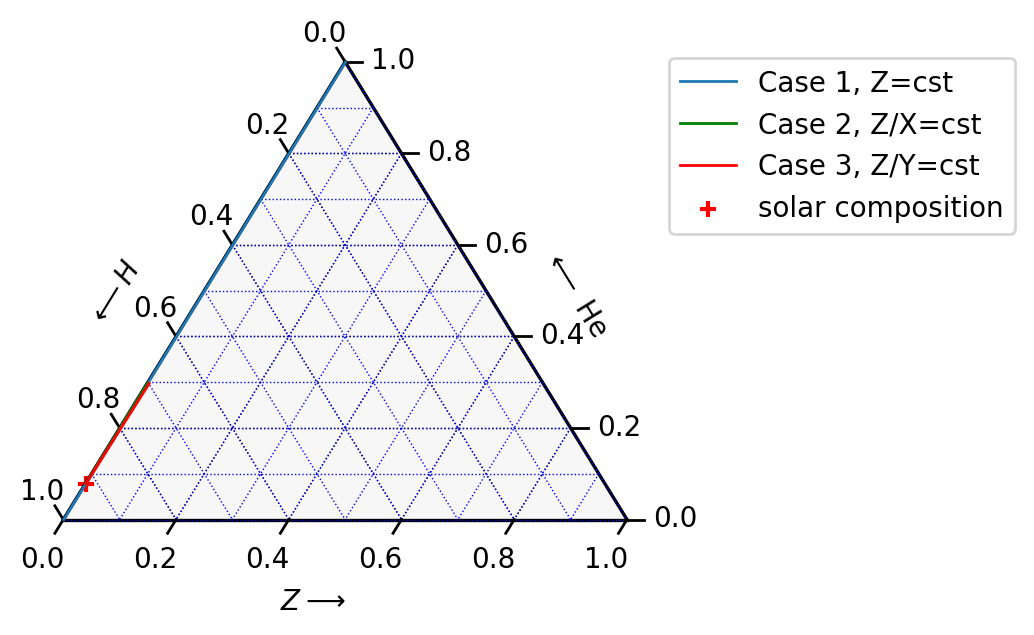

In [3]:
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams['figure.figsize'] = (4, 3.5)



## Boundary and Gridlines
scale = 1
fontsize = 10
offset=0.16


figure, tax = ternary.figure(scale=scale )

# Draw Boundary and Gridlines
tax.boundary(linewidth=1.2)
tax.gridlines(color="black", multiple=0.2)
tax.gridlines(color="blue", multiple=0.1, linewidth=0.5)

# Set Axis labels and Title

#tax.set_title("sunar System composition ", fontsize=fontsize)
tax.left_axis_label(" $\longleftarrow H$  ", fontsize=fontsize,offset=offset)
tax.right_axis_label("$\longleftarrow$ He ", fontsize=fontsize,offset=offset)
tax.bottom_axis_label("$Z \longrightarrow$  ", fontsize=fontsize, offset=offset)

# Set ticks
#tax.ticks(axis='lbr', linewidth=1)
tax.ticks(axis='lbr', linewidth=1, multiple=0.2, tick_formats="%.1f", offset=0.03)



n=5.

#solar composition:
psun=[(Zsun, Ysun, Xsun)] 
tax.scatter(psun, marker='+', color='red',label="solar composition")




p1=(Zsun, Ysun, Xsun)
#CASE1
tax.left_parallel_line(Zsun,linewidth=1.,label="Case 1, Z=cst")

#CASE2
X2,Y2,Z2=case2(Xsun,Ysun,Zsun,n)
p2=( Z2, Y2, X2 )

tax.line(p1, p2,linewidth=1.,color='green', label="Case 2, Z/X=cst")


#CASE3
X3,Y3,Z3=case3(Xsun,Ysun,Zsun,n)
p3=(Z3, Y3, X3)

tax.line(p1, p3, linewidth=1., color='red',label="Case 3, Z/Y=cst")


# Remove default Matplotlib Axes
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()


tax.legend(bbox_to_anchor=(1,1))

ternary.plt.show()
    

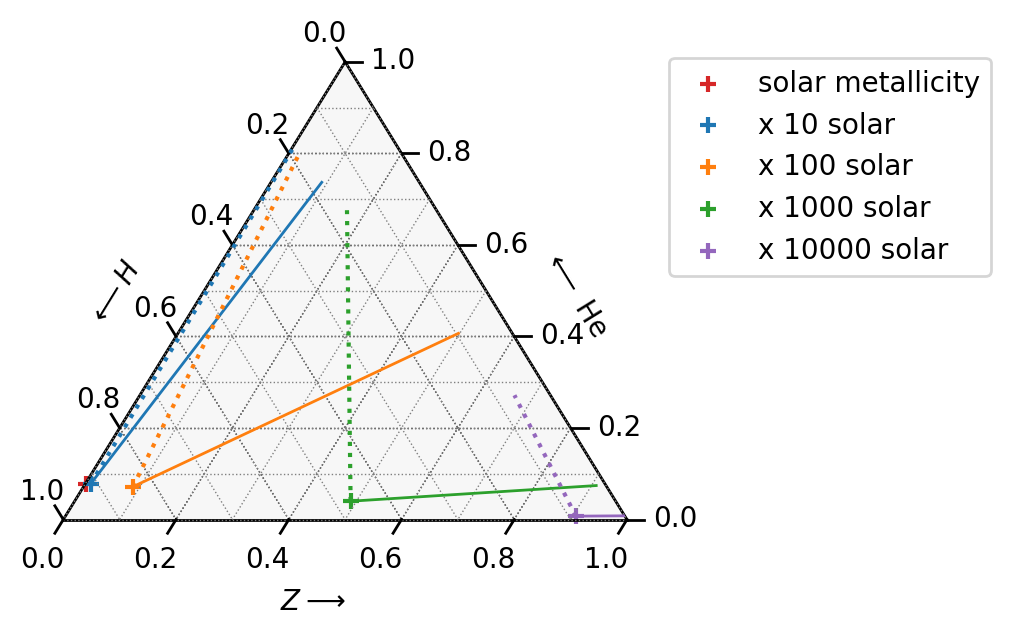

In [4]:
#now let's plot metal-enriched cases
N=8
#factors=np.linspace(m.log10(5.),4,N)
#factors=10**factors
factors=[10,100,1000,10000] #metal enrichment factors

X=np.zeros(len(factors))
Y=np.zeros(len(factors))
Z=np.zeros(len(factors))

i=0
for enrichment in factors:
    
    zsum_enrich=zsum*enrichment
    totsum_enrich=10**(Aspl09.H[0] -12.)+10**(Aspl09.He[0]-12.)+zsum_enrich
    
    X[i]=10**(Aspl09.H[0] -12.)/totsum_enrich
    Y[i]=10**(Aspl09.He[0]-12.)/totsum_enrich
    Z[i]=zsum_enrich/totsum_enrich
    
    #print(enrichment, Z[i], X[i] )
    i+=1
############################# now let's plot them

matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams['figure.figsize'] = (4, 3.5)



## Boundary and Gridlines
scale = 1
fontsize = 10
offset=0.16


figure, tax = ternary.figure(scale=scale )

# Draw Boundary and Gridlines
tax.boundary(linewidth=1.)
tax.gridlines(color="black", multiple=0.2)
tax.gridlines(color="grey", multiple=0.1, linewidth=0.5)

# Set Axis labels and Title

#tax.set_title("Solar System composition ", fontsize=fontsize)
tax.left_axis_label(" $\longleftarrow H$  ", fontsize=fontsize,offset=offset)
tax.right_axis_label("$\longleftarrow$ He ", fontsize=fontsize,offset=offset)
tax.bottom_axis_label("$Z \longrightarrow$  ", fontsize=fontsize, offset=offset)

# Set ticks
#tax.ticks(axis='lbr', linewidth=1)
tax.ticks(axis='lbr', linewidth=1, multiple=0.2, tick_formats="%.1f", offset=0.03)


colors=[ "tab:blue","tab:orange", "tab:green","tab:purple", 
        "tab:red", "tab:brown", "tab:pink", "tab:grey", "tab:olive", "tab:cyan"]
n=50

p1=[(Zsun, Ysun, Xsun)] # current compositon of the Sun, Asplund+ 2009
tax.scatter(p1, marker='+',label="solar metallicity",color=colors[len(factors)])

for i in range(0, len(factors)):
    p=[(Z[i], Y[i], X[i])] # current compositon of the Sun, Asplund+ 2009
    tax.scatter(p, marker='+', label="x "+ str(factors[i]) + " solar", color=colors[i])
    
    PLINE=(Z[i], Y[i], X[i])
    #CASE2
    X2,Y2,Z2=case2(X[i],Y[i],Z[i],n)
    p2=( Z2, Y2, X2 )
    tax.line(PLINE, p2,linewidth=1.5,color=colors[i],linestyle=":")

    #CASE3
    X3,Y3,Z3=case3(X[i],Y[i],Z[i],n)
    p3=(Z3, Y3, X3)
    tax.line(PLINE, p3, linewidth=1.,color=colors[i])
    #print("\n")
    #print(Z[i], Y[i], X[i])
    #print(Z2, Y2, X2)
    #print(Z3, Y3, X3)
    





tax.legend(bbox_to_anchor=(1,1))

# Remove default Matplotlib Axes
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()

ternary.plt.show()




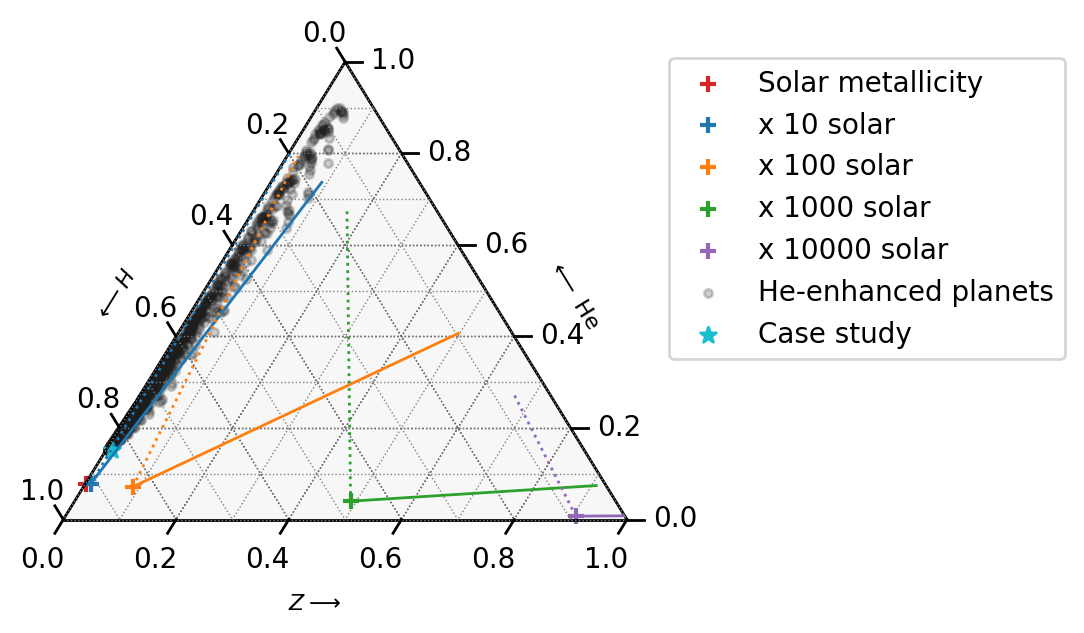

In [5]:
#And now let's plot compositions from a real simulation:
file_isaac=open("Number_Fractions.txt","r")
l_ic=file_isaac.readlines()

X_ic=[]
Y_ic=[]
Z_ic=[]

for i in range(1,len(l_ic)):
    elt_ic=l_ic[i].split(",")
    
    X_ic.append( float(elt_ic[1]) )
    Y_ic.append( float(elt_ic[2])+float(elt_ic[3]) )
    Z_ic.append( float(elt_ic[4])+float(elt_ic[5])+float(elt_ic[6])+float(elt_ic[7])+float(elt_ic[8]) )
    
    #print(X_ic[i-1]+Y_ic[i-1]+Z_ic[i-1],  float(elt_ic[1]) + float(elt_ic[2]) + float(elt_ic[3]) + float(elt_ic[4]) + 
                                             #float(elt_ic[5]) + float(elt_ic[6]) + float(elt_ic[7])+float(elt_ic[8]) )

        
        
        
#now let's print

matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams['figure.figsize'] = (4, 3.5)



## Boundary and Gridlines
scale = 1
fontsize = 8
offset=0.16


figure, tax = ternary.figure(scale=scale )

# Draw Boundary and Gridlines
tax.boundary(linewidth=1.)
tax.gridlines(color="black", multiple=0.2)
tax.gridlines(color="grey", multiple=0.1, linewidth=0.5)

# Set Axis labels and Title

#tax.set_title("sunar System composition ", fontsize=fontsize)
tax.left_axis_label(" $\longleftarrow H$  ", fontsize=fontsize,offset=offset)
tax.right_axis_label("$\longleftarrow$ He ", fontsize=fontsize,offset=offset)
tax.bottom_axis_label("$Z \longrightarrow$  ", fontsize=fontsize, offset=offset)

# Set ticks
#tax.ticks(axis='lbr', linewidth=1)
tax.ticks(axis='lbr', linewidth=1, multiple=0.2, tick_formats="%.1f", offset=0.03)





colors=["tab:blue","tab:orange", "tab:green",  "tab:purple", "tab:red", "tab:brown", "tab:pink", "tab:grey", "tab:olive", "tab:cyan"]
p1=[(Zsun, Ysun, Xsun)] # current compositon of the Sun, Asplund+ 2009
tax.scatter(p1, marker='+', label="Solar metallicity",color=colors[len(factors)])

n=50
for i in range(0, len(factors)):
    p=[(Z[i], Y[i], X[i])] # current compositon of the Sun, Asplund+ 2009
    tax.scatter(p, marker='+', label="x "+ str(factors[i]) + " solar", color=colors[i])
    
    PLINE=(Z[i], Y[i], X[i])
    #CASE2
    X2,Y2,Z2=case2(X[i],Y[i],Z[i],n)
    p2=( Z2, Y2, X2 )
    tax.line(PLINE, p2,linewidth=1.,color=colors[i],linestyle=":")

    #CASE3
    X3,Y3,Z3=case3(X[i],Y[i],Z[i],n)
    p3=(Z3, Y3, X3)
    tax.line(PLINE, p3, linewidth=1.,color=colors[i])
    
    
#Isaac's planets:
for i in range(0,len(l_ic)-1):
    p=[(Z_ic[i], Y_ic[i], X_ic[i])] 
    tax.scatter(p, marker='.', color=(0.1, 0.1, 0.1, 0.2) )
    
p=[(Z_ic[i], Y_ic[i], X_ic[i])] 
tax.scatter(p, marker='.', color=(0.1, 0.1, 0.1, 0.2), label="He-enhanced planets" )

X_case=0.838289443727963 
Y_case=0.1509670034068709 
Z_case=0.010743552865166008

p=[(Z_case, Y_case, X_case)] 
tax.scatter(p, marker='*', color="tab:cyan", label="Case study" )


tax.legend(bbox_to_anchor=(1,1))

# Remove default Matplotlib Axes
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()

ternary.plt.show()

In [6]:
#let's generate the abundance files for fastchem:
m_factors=[1, 10., 100., ] #metallicity enrichments
he_factors=[1., 10.] #He enrichments


X_grid=np.zeros(( len(m_factors), len(he_factors) ))
Y_grid=np.zeros(( len(m_factors), len(he_factors) ))
Z_grid=np.zeros(( len(m_factors), len(he_factors) ))




#double loop to generate all the composition files:
for ii in range(0,len(m_factors)):
    #print("\n")
    for jj in range(0, len(he_factors)):
        
            filename="element_M="+str(m_factors[ii])+"times_solar_He="+str(he_factors[jj])+"times_solar.dat"
            file=open(filename,"w")

            file.write( "%s \n"
                % ("#The solar chemical composition Asplund et al 2009, metals enrichment of "+str(m_factors[ii])+ 
                  " He enrichment of "+ str(he_factors[jj])) )
            file.write( "%s \n" %("e-  13.1139") )
            
            
            
            #accounting for a modified metal composition
            zsum_enrich=zsum_save*m_factors[ii]
            totsum_enrich=10**(Aspl09.H[0] -12.)+10**(Aspl09.He[0]-12.)+zsum_enrich
    
            Xsun_menr=10**(Aspl09.H[0] -12.)/totsum_enrich
            Ysun_menr=10**(Aspl09.He[0]-12.)/totsum_enrich
            Zsun_menr=zsum_enrich/totsum_enrich
    
            #print("solar:",Xsun,Ysun,Zsun)
            #print("Enr. :",Xsun_menr,Ysun_menr,Zsun_menr)
    
    
    
            #accounting for a He enrichment 
            Xstk,Ystk,Zstk=case2(Xsun_menr,Ysun_menr,Zsun_menr,he_factors[jj])
            #print("m & n:",Xstk,Ystk,Zstk)
            zeta=(Zstk/Xstk) /(Zsun/Xsun) #this is the factor actually used to modify the Asplund compositions
            #accounts for change in X and a change in metallicity too
            #print(zeta)
            
            
            
            
            
            
            
            #Write the files and recompute the number fractions to double-check:
            new_abund=Aspl09_save
            
            totsum=0.
            zsum=0.
            for (columnName, columnData) in new_abund.iteritems():
                #    print('Colunm Name : ', columnName)
                #    print('Column Contents: ', columnData.values)
                
                epsx=columnData.values[0]
                
                if columnName!="H" and columnName!="He":
                    
                    epsx=epsx+m.log10(zeta) #m.log10(m_factors[ii])
                
                elif columnName=="He":
                    epsx=m.log10(Ystk/Xstk) + 12. #m.log10(he_factors[jj])
        
                #get the right format #generate the input files
                file.write( "%s %f \n" % (columnName, epsx) )

                
                nxratio=10**(epsx-12.)

                totsum+=nxratio
                
                #print(ii,jj,epsx,columnData.values[0])
                
                if columnName!="H" and columnName!="He":
                    zsum+=nxratio


                
            X_grid[ii,jj]=10**(new_abund.H[0] -12.)/totsum
            Y_grid[ii,jj]=10**(new_abund.He[0]+m.log10(he_factors[jj])-12.)/totsum
            Z_grid[ii,jj]=zsum/totsum
            
            #print(X_grid[ii,jj], Y_grid[ii,jj], Z_grid[ii,jj],"---",m_factors[ii],he_factors[jj])
            #print('\n')
            #print("fin  :",X_grid[ii,jj], Y_grid[ii,jj], Z_grid[ii,jj],"---",m_factors[ii],he_factors[jj])
            #print('\n')
            
            file.close()  
        
        
        


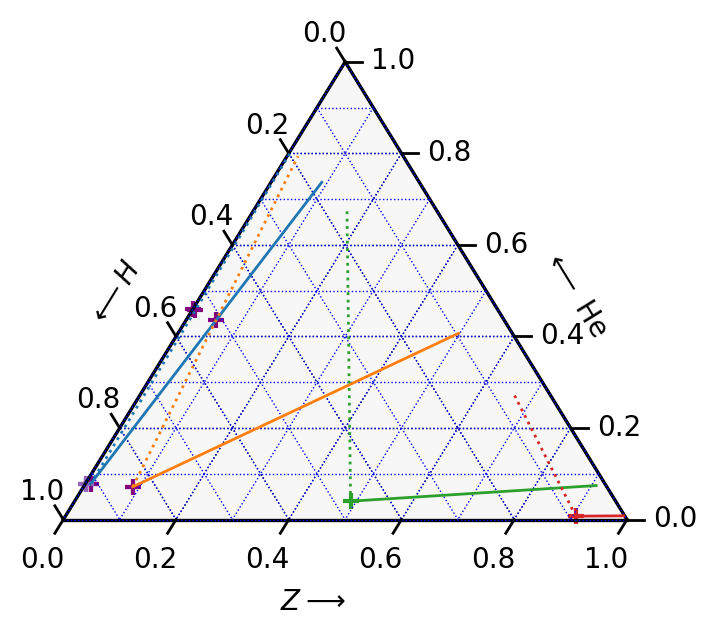

In [7]:
#let's plot what compositions we have generated
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams['figure.figsize'] = (4, 3.5)



## Boundary and Gridlines
scale = 1
fontsize = 10
offset=0.16


figure, tax = ternary.figure(scale=scale )

# Draw Boundary and Gridlines
tax.boundary(linewidth=1.2)
tax.gridlines(color="black", multiple=0.2)
tax.gridlines(color="blue", multiple=0.1, linewidth=0.5)

# Set Axis labels and Title

#tax.set_title("Solar System composition ", fontsize=fontsize)
tax.left_axis_label(" $\longleftarrow H$  ", fontsize=fontsize,offset=offset)
tax.right_axis_label("$\longleftarrow$ He ", fontsize=fontsize,offset=offset)
tax.bottom_axis_label("$Z \longrightarrow$  ", fontsize=fontsize, offset=offset)

# Set ticks
#tax.ticks(axis='lbr', linewidth=1)
tax.ticks(axis='lbr', linewidth=1, multiple=0.2, tick_formats="%.1f", offset=0.03)


colors=["tab:blue","tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", 
        "tab:pink", "tab:grey", "tab:olive", "tab:cyan"]
n=50
for i in range(0, len(factors)):
    p=[(Z[i], Y[i], X[i])] # current compositon of the Sun, Asplund+ 2009
    tax.scatter(p, marker='+', label=factors[i], color=colors[i])
    
    PLINE=(Z[i], Y[i], X[i])
    #CASE2
    X2,Y2,Z2=case2(X[i],Y[i],Z[i],n)
    p2=( Z2, Y2, X2 )
    tax.line(PLINE, p2,linewidth=1.,color=colors[i],linestyle=":")

    #CASE3
    X3,Y3,Z3=case3(X[i],Y[i],Z[i],n)
    p3=(Z3, Y3, X3)
    tax.line(PLINE, p3, linewidth=1.,color=colors[i])
    
    
#composition grid
for ii in range(0,len(m_factors)):
    for jj in range(0, len(he_factors)):
        p=[(Z_grid[ii,jj], Y_grid[ii,jj], X_grid[ii,jj])] 

        tax.scatter(p, marker='+', color="purple" )


p1=[(Zsun, Ysun, Xsun)] # current compositon of the Sun, Asplund+ 2009
tax.scatter(p1, marker='+',label="solar",color=colors[len(factors)])




# Remove default Matplotlib Axes
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()

ternary.plt.show()